# OpenAI

In [2]:
import openai
import tomli

In [3]:
with open(".streamlit/secrets.toml","rb") as f:
    toml_dict = tomli.load(f)

In [4]:
openai.api_key = toml_dict['OPEN_AI_KEY']

## Dall-e

https://openai.com/dall-e-2/

In [8]:
response = openai.Image.create(
  prompt="a funny corgi",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']

In [9]:
from IPython.display import Image
Image(url = image_url)

In [10]:
from urllib.request import urlretrieve
urlretrieve(image_url,filename="img/corgi.png")

('img/corgi.png', <http.client.HTTPMessage at 0x22089935310>)

## Image processing

In [5]:
# Convert jpg to png
from PIL import Image

im1 = Image.open(r'img/dechargement.jpg')
im1.save(r'img/dechargement.png')

### Crop image: option 1
https://www.mathworks.com/help/images/ref/imageviewer-app.html

In [32]:
import matlab.engine
m = matlab.engine.connect_matlab()

In [33]:
import numpy as np
im = np.array(im1)
im = matlab.uint8(im) # with 22a still need to cast to a uint8, not with 22b anymore
# m.workspace['im'] = im

In [34]:
m.imtool(im,nargout=0) # requires Image Processing Toolbox

In [35]:
# m.exit()

### Crop image: option 2 (non-interactive)

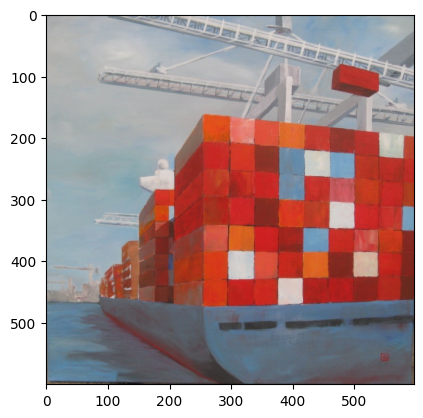

In [24]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [26]:
left=0
top=0
right=512
bottom=512
im2 = im1.crop((left, top, right, bottom))
im2.save("img/cropped2.png")

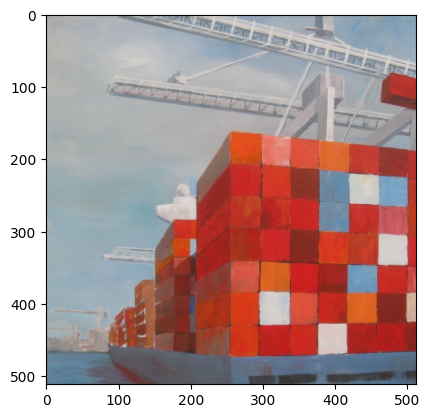

In [27]:
plt.imshow(np.array(im2))

## Image Variation

https://beta.openai.com/docs/guides/images/variations

In [28]:
response = openai.Image.create_variation(
  image=open("img/cropped.png", "rb"),
  n=5,
  size="512x512"
)

In [31]:
for i in range(5):
    image_url = response['data'][i]['url']
    urlretrieve(image_url,"img/dechargement"+str(i)+".png")